# Problem 1



$$min_x ||y - Ax||_2$$
is equivalent to 
$$min_{\hat{y}}||y - \hat{y}||$$
being $\hat{y}$ in $R(A)$

Now I want to prove the problem is quivalent to:
$$(y-\hat{y})^Hv = 0, \forall v \in R(A)$$
Consider any that $y_o$ is the vercor in range of A st $y - y_o$ is orthogonal to all vercors in range of A and $\hat{y}$ is any other vector in range of A
  $$||y - \hat{y}||_{2}^{2} = ||y - y_o + y_o - \hat{y}||_{2}^{2} = ||y - y_o||_{2}^{2} +  ||y_o - \hat{y}||_{2}^{2} + (y - y_o)^H(y_o - \hat{y}) + (y_o - \hat{y})^H(y - y_o)$$
  As we said $y - y_o$ is perpendicular to all vectors in $R(A)$ and $y_o - \hat{y} \in R(A)$ because they are both in $R(A)$, so:
  $$(y - y_o)^H(y_o - \hat{y}) = 0 \text{and} (y_o - \hat{y})^H(y - y_o) = 0\\
  \Rightarrow ||y - \hat{y}||_{2}^{2} = ||y - y_o||_{2}^{2} +  ||y_o - \hat{y}||_{2}^{2} \geq ||y - y_o||_{2}^{2}$$
  So $y_o$, the vector in range of A st $y - y_o$ is orthogonal to all vercors in range of A is the solution.
   That proves that 
  $$min_{\hat{y}}||y - \hat{y}|| \Leftrightarrow (y-\hat{y})^Hv = 0, \forall v \in R(A)$$
  We can substitute $\forall v \in R(A)$ by just one basis of $R(A)$. $A$ will have that basis, and if $rank(A) < n$ it will just have some extra columns
  $$(y-\hat{y})^HA = 0 \\ A^H (y-\hat{y}) = 0 \\ A^H y - A^H \hat{y} = 0 \\ A^H y = A^H \hat{y} \\ A^H y = A^H A x$$
  In the last step, as $\hat{y}\in R(A)$ I have represented it with $Ax$
    
    




$(a)$

Yes

We can follow the same steps than in the previous demostration, but instead of choosing the matrix $A$ I will chooshe the matrix $V = [b_1, ..., b_k]$ being ${b_1, ..., b_k}$ a basis for $R(A)$

$$(y-\hat{y})^Hv = 0, \forall v \in R(A)$$
We can substitute $\forall v \in R(A)$ by just one basis of $R(A)$. $V$ will have that basis.
$$(y-\hat{y})^HV = 0 \\ V^H (y-\hat{y}) = 0 \\ V^H y - V^H \hat{y} = 0 \\V^H y = V^H \hat{y} \\ V^H y = V^H V x$$
In the last step, as $\hat{y}\in R(A)$ I have represented it with $Vx$
    
As $V^HV$ will be a $KxK$ matrix with $rank(V^HV) = k$ it will be invertible and the system will have the solution
    
   $$(V^H V )^{-1}V^H y = x$$
    


$(b)$ 

I have already shown it at lest has 1 solution
If there are more than one is because $N(A) \neq \{0\}$ and $\hat{y} = Ax$ has infinite solutions, so
$$A^H y = A^H A x$$
will have infinite solutions


$(c)$

If $rank(A)<n$ then $A^HA$ won't be invertible. The equation will have infinite solutions. To find one we can use the SVD:
$$A^Hy = A^HAx\\
(U\Sigma V^T)^Ty = (U\Sigma V^T)^T(U\Sigma V^T)x\\
V\Sigma^TU^Ty = V\Sigma^TU^TU\Sigma V^Tx\\
V\Sigma^TU^Ty = V\Sigma^T\Sigma V^Tx\\
U^Ty = \Sigma V^Tx\\
y = U \Sigma V^T x\\
V \Sigma^{-1} U^T y = x
$$
$\Sigma^{-1}$ is easy to compute as it is a diagonal matrix

# Problem 2

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
database = scipy.io.loadmat("mnist.mat")

## (a) Binary classifier


To normalize the data I just divide the X data by 255

In [ ]:
testX = database['testX'] / 255
database_testY = database['testY'] * 1.0
trainX = database['trainX'] / 255
database_trainY = database['trainY'] * 1.0
trainX.shape

(60000, 784)

We can check the data is indeed normalized

In [ ]:
print(np.min(trainX), np.max(trainX))
print(np.min(testX), np.max(testX))

0.0 1.0
0.0 1.0


For the binary classifier I will choose the labels $1$ for the number 5 and $-1$ for any other

In [ ]:
#get the labels 1 and -1 for 5 or others respectivly
testY = np.array(database_testY)
for i in range(testY.shape[1]):
    testY[0][i] = 1 if testY[0][i] == 5 else -1
trainY = np.array(database_trainY)
for i in range(trainY.shape[1]):
    trainY[0][i] = 1 if trainY[0][i] == 5 else -1

To test the binary clasifier I have made this function that gives true positive, true negative, false positive, false negative, overal accuracy and error rate

In [ ]:
def accuracy(Y_hat, Y):
    TP = 0;
    FP = 0;
    TN = 0;
    FN = 0;
    for i in range(Y_hat.shape[0]):
        if Y_hat[i] == 1 and Y[0][i] == 1:
            TP = TP + 1
        elif Y_hat[i] == 1 and Y[0][i] == -1:
            FP = FP + 1
        elif Y_hat[i] == -1 and Y[0][i] == -1:
            TN = TN + 1
        elif Y_hat[i] == -1 and Y[0][i] == 1:
            FN = FN + 1
    print("TP", TP)
    print("FP", FP)
    print("TN", TN)
    print("FN", FN)
    print("Total accuracy", (TP + TN) / (TP + TN + FP + FN))
    print("Total error rate", (FP + FN) / (TP + TN + FP + FN))
    print()

In [ ]:
def run(X, Y, train = True):
    X = np.concatenate((X, np.full((X.shape[0], 1), 1)), axis = 1) #concatenate a column of ones to compute the alpha in the same matrix multiplication
    if (train):
        run.alphabeta = np.linalg.inv(X.T @ X) @ X.T @ Y.T
    X = X @ run.alphabeta
    for i in range(X.shape[0]): #sign()
        X[i] = -1 if X[i] < 0 else 1
    return X

Ussing this 'training' fromula we run into a problem. We are assuming X columns are linealy independant. It is not a big assumntion, for the training set it is a 60000 by 729 matix so it is likely to be that way. Let's check it:

In [ ]:
print(np.linalg.matrix_rank(trainX))
print(trainX.shape)

712
(60000, 784)


We can see the assumntion doesn't hold. 
To make the columns linealy independant we can do what was propposed in class and in the book: remove the 'pixels' that are non-zero in less that 600 datapoints. Probably the linear dependeces come from those pixels, there might even be some pixels that are always 0

In [ ]:
delete = []
for j in range(trainX.shape[1]):
    count = 0
    for i in range(trainX.shape[0]):
        if trainX[i][j] != 0:
            count = count + 1;
    for i in range(testX.shape[0]):
        if testX[i][j] != 0:
            count = count + 1;
    if count < 600:
        delete.append(j)

trX = np.array(trainX)
teX = np.array(testX)
trX = np.delete(trX, delete, 1)
teX = np.delete(teX, delete, 1)
  
print(np.linalg.matrix_rank(trX))
print(trX.shape)
print(np.linalg.matrix_rank(teX))
print(teX.shape)


502
(60000, 502)
502
(10000, 502)


In [ ]:
accuracy(run(trX, trainY), trainY)
accuracy(run(teX, 0, train = False), testY)

TP 2370
FP 304
TN 54275
FN 3051
Total accuracy 0.9440833333333334
Total error rate 0.05591666666666667

TP 407
FP 57
TN 9051
FN 485
Total accuracy 0.9458
Total error rate 0.0542



We can see this solution works, but it is not ideal because it is not going to work with any input, and in the second part of the project if we want to test different weights for the first layer we will run constantly against the linear dependecy problem.

We can use the method explained in the problem one to obtain the pseudoinverse and find one of the solutions

In [ ]:
def run(X, Y, train = True):
    X_cpy = np.concatenate((X, np.full((X.shape[0], 1), 1)), axis = 1) #concatenate a column of ones to compute the alpha in the same matrix multiplicati
    if (train):
        U, E_v, V_T = np.linalg.svd(X_cpy, full_matrices=False)
        E_inv = np.matrix([[0 if i != j else 1/E_v[i] for j in range(len(E_v))] for i in range(len(E_v))])
        run.alphabeta = V_T.T @ E_inv @ U.T @ Y.T
    X_cpy = X_cpy @ run.alphabeta
    for i in range(X.shape[0]): #sign
        X_cpy[i] = -1 if X_cpy[i] < 0 else 1
    return X_cpy

This function runs

$$\hat{f}(x) = sign(\beta^T x + \alpha)$$
being $\beta$ and $\alpha$ the learned parameters computing 
$$min_{\alpha, \beta}\sum_{i=1}^N(y_i - \beta^Tx - \alpha)$$
The function trains these parameters if the argument trains is passed as True

To compute the parameter $\alpha$ I concatenate a columns of 1 to $X$ an $\alpha$ to the vector $\beta$

In the program it might seem the multuplication is done the other way round, but given the dimension of X, and what each one represents in the numpy array this is the way to go

In [ ]:
accuracy(run(trainX, trainY), trainY)
accuracy(run(testX, 0, train = False), testY)

TP 2406
FP 303
TN 54276
FN 3015
Total accuracy 0.9447
Total error rate 0.0553

TP 413
FP 59
TN 9049
FN 479
Total accuracy 0.9462
Total error rate 0.0538



The learned parameters will be:

In [ ]:
print(run.alphabeta.shape)
print(run.alphabeta)

(785, 1)
[[ 9.23184578e+12]
 [ 2.19796835e+12]
 [ 3.65122503e+11]
 [-2.74456331e+12]
 [ 2.07466840e+12]
 [-3.10342255e+12]
 [-3.21578344e+12]
 [ 4.16384984e+11]
 [-2.53252007e+12]
 [-3.00831880e+12]
 [ 2.91806345e+12]
 [ 2.12132680e+12]
 [ 1.58624749e+12]
 [-7.24427986e+11]
 [ 6.61424795e+11]
 [-2.50420627e+11]
 [ 6.71957998e+11]
 [-1.64423851e+12]
 [-5.48548274e+11]
 [-3.66451592e+12]
 [ 3.05706907e+12]
 [-3.30714393e+12]
 [-1.25807808e+12]
 [-1.13269150e+11]
 [ 1.01844303e+12]
 [ 9.29632145e+11]
 [ 5.02174199e+12]
 [-1.80698873e+12]
 [ 1.32406120e+11]
 [ 5.70541898e+12]
 [ 4.11889328e+11]
 [ 3.87835568e+12]
 [-2.65879342e+01]
 [ 9.32454272e+00]
 [-1.21103687e-01]
 [-5.34774585e-01]
 [-1.50485953e-01]
 [ 1.08379744e-01]
 [-5.41979855e-02]
 [-7.13671074e-02]
 [ 1.59631826e-01]
 [-1.43489906e-01]
 [ 6.39149744e-02]
 [-3.75370462e-02]
 [ 4.02717429e-02]
 [-1.99370907e-02]
 [ 9.56828614e-02]
 [-1.64694852e-01]
 [ 4.24135188e-02]
 [ 3.72917433e-02]
 [ 5.83945184e-01]
 [-5.87362218e-01]
 [-

## (B) Milti-class one versus all

In [ ]:
#reload from database, as we have already modified the labels
testX = database['testX'] / 255
testY = database['testY'] * 1.0
trainX = database['trainX'] / 255
trainY = database['trainY'] * 1.0
trainX.shape

(60000, 784)

The method used in the secction (a) is not very scalable for the other parts. I will make a class for the binary classifier that is given the labels that correspond to 1, the labels that correspond to -1 and the labels that should be ingnored (usefull feature for section c)

In [ ]:
print_v = 1
class  binary_classifier():
    def __init__(self, X, Y, pos_lab, neg_lab, labels_to_ignore):
        #Remove rows from labels_to_ignore and transform pos_lab to +1 and neg_lab to -1
        if print_v != 0:
            print(pos_lab, neg_lab, labels_to_ignore)
        Y_cpy = np.copy(Y)
        X_cpy = np.copy(X)
        delete = []
        for i in range(Y.shape[1]):
            if Y[0][i] in labels_to_ignore:
                delete.append(i)
            if Y[0][i] in pos_lab:
                Y_cpy[0][i] = 1
            if Y[0][i] in neg_lab:
                Y_cpy[0][i] = -1
        X_cpy = np.delete(X_cpy, delete, 0)
        Y_cpy = np.delete(Y_cpy, delete, 1)
        #Add ones to the X matrix
        X_cpy = np.concatenate((X_cpy, np.full((X_cpy.shape[0], 1), 1)), axis = 1)
        #Learn parameters
        U, E_v, V_T = np.linalg.svd(X_cpy, full_matrices=False)
        E_inv = np.matrix([[0 if i != j else 1/E_v[i] for j in range(len(E_v))] for i in range(len(E_v))])
        self.alphabeta = V_T.T @ E_inv @ U.T @ Y_cpy.T
    def run(self, X):
        X_cpy = np.concatenate((X, np.full((X.shape[0], 1), 1)), axis = 1)
        Y_hat = X_cpy @ self.alphabeta
        return Y_hat

This multi class clasifier has 10 binary classifiers. Each one is a one vs all classifier (ex. differenciating number 3 agains all others). To do the 'predictions' it runs all 10 classifiers and the the one that gives highes label is the one 'predicted'. The highest label is correlated with the binary classifier beeing more confident.

In [ ]:
class multiClass_OneVsAll():
    def __init__(self, X, Y):
        #train binary classifier
        self.BC = []
        for i in range(10): #learn all binary classifiers
            self.BC.append(binary_classifier(X, Y, [i], [j for j in range(10) if j != i], []))
    def run(self, X):
        Y_hat = self.BC[0].run(X)
        for i in range(1, 10): #run all 10 classifiers
            Y_hat = np.concatenate([Y_hat, self.BC[i].run(X)] , axis = 1)
        Y_hat = np.argmax(Y_hat, axis = 1) #choose the maximum label
        return Y_hat.reshape(1, -1) #reshape so the shape is the same as testY or trainY

Lets test the classier

In [ ]:
MC_oneVsAll = multiClass_OneVsAll(trainX, trainY)

[0] [1, 2, 3, 4, 5, 6, 7, 8, 9] []
[1] [0, 2, 3, 4, 5, 6, 7, 8, 9] []
[2] [0, 1, 3, 4, 5, 6, 7, 8, 9] []
[3] [0, 1, 2, 4, 5, 6, 7, 8, 9] []
[4] [0, 1, 2, 3, 5, 6, 7, 8, 9] []
[5] [0, 1, 2, 3, 4, 6, 7, 8, 9] []
[6] [0, 1, 2, 3, 4, 5, 7, 8, 9] []
[7] [0, 1, 2, 3, 4, 5, 6, 8, 9] []
[8] [0, 1, 2, 3, 4, 5, 6, 7, 9] []
[9] [0, 1, 2, 3, 4, 5, 6, 7, 8] []


Let's check it works, and gives a reazonable output

In [ ]:
pred = MC_oneVsAll.run(testX)
print(pred.shape)
print(pred)

(1, 10000)
[[7 2 1 ... 4 5 6]]


## (B) Milti-class one versus one

This multi class clasifier has 45 binary classifiers. Each one is a one vs one classifier (ex. differenciating number 3 against 5). To do the 'predictions' it runs all 45 classifiers. Each classifier has a 'vote' on which number might be and the number with more votes is the 'predicted' one.

My implementation doesn't brake ties in any sofisticated way, but as we will see later it still outperforms the one vs all multi class clasifier

In [ ]:
class multiClass_OneVsOne():
    def __init__(self, X, Y):
        #train binary classifier
        self.BC = []
        for i in range(10):
            for j in range(i + 1, 10):
                self.BC.append(binary_classifier(X, Y, [i], [j],[k for k in range(10) if k not in [i, j]]))
    def run(self, X):
        votes = np.zeros((X.shape[0], 10))
        k = 0
        for i in range(10):
            for j in range(i + 1, 10):
                pred = self.BC[k].run(X)
                k += 1
                for l in range(pred.shape[0]):
                    if pred[l][0] > 0:
                        votes[l][i] += 1
                    else:
                        votes[l][j] += 1
        Y_hat = np.argmax(votes, axis = 1)
        return Y_hat.reshape(1, -1)

In [ ]:
MC_oneVsOne = multiClass_OneVsOne(trainX, trainY)

[0] [1] [2, 3, 4, 5, 6, 7, 8, 9]
[0] [2] [1, 3, 4, 5, 6, 7, 8, 9]
[0] [3] [1, 2, 4, 5, 6, 7, 8, 9]
[0] [4] [1, 2, 3, 5, 6, 7, 8, 9]
[0] [5] [1, 2, 3, 4, 6, 7, 8, 9]
[0] [6] [1, 2, 3, 4, 5, 7, 8, 9]
[0] [7] [1, 2, 3, 4, 5, 6, 8, 9]
[0] [8] [1, 2, 3, 4, 5, 6, 7, 9]
[0] [9] [1, 2, 3, 4, 5, 6, 7, 8]
[1] [2] [0, 3, 4, 5, 6, 7, 8, 9]
[1] [3] [0, 2, 4, 5, 6, 7, 8, 9]
[1] [4] [0, 2, 3, 5, 6, 7, 8, 9]
[1] [5] [0, 2, 3, 4, 6, 7, 8, 9]
[1] [6] [0, 2, 3, 4, 5, 7, 8, 9]
[1] [7] [0, 2, 3, 4, 5, 6, 8, 9]
[1] [8] [0, 2, 3, 4, 5, 6, 7, 9]
[1] [9] [0, 2, 3, 4, 5, 6, 7, 8]
[2] [3] [0, 1, 4, 5, 6, 7, 8, 9]
[2] [4] [0, 1, 3, 5, 6, 7, 8, 9]
[2] [5] [0, 1, 3, 4, 6, 7, 8, 9]
[2] [6] [0, 1, 3, 4, 5, 7, 8, 9]
[2] [7] [0, 1, 3, 4, 5, 6, 8, 9]
[2] [8] [0, 1, 3, 4, 5, 6, 7, 9]
[2] [9] [0, 1, 3, 4, 5, 6, 7, 8]
[3] [4] [0, 1, 2, 5, 6, 7, 8, 9]
[3] [5] [0, 1, 2, 4, 6, 7, 8, 9]
[3] [6] [0, 1, 2, 4, 5, 7, 8, 9]
[3] [7] [0, 1, 2, 4, 5, 6, 8, 9]
[3] [8] [0, 1, 2, 4, 5, 6, 7, 9]
[3] [9] [0, 1, 2, 4, 5, 6, 7, 8]
[4] [5] [0

Let's check it works, and gives a reazonable output

In [ ]:
pred = MC_oneVsOne.run(testX)
print(pred.shape)
print(pred)

(1, 10000)
[[7 2 1 ... 4 5 6]]


## (d) Evaluate results

This is the function that runs the confusion matrix 

In [ ]:
def confusionMatrix(Y, Y_hat):
    #calculate the confusion matrix and save it in count
    err = 0
    count = np.zeros((10, 10))
    for i in range(Y.shape[1]):
        count[int(Y[0, i]), int(Y_hat[0, i])] += 1
        if Y[0, i] != Y_hat[0, i]:
            err += 1
    #print the results
    print("\t", end = "")
    for i in range (10):
        print(i, end = "\t")
    print()
    for i in range (10):
        print(i, end = "\t")
        for j in range (10):
            print(int(count[i][j]), end = "\t")
        print()
    print("Total error rate:", err / Y.shape[1])
    return(err / Y.shape[1])

In [ ]:
print("Training results:")
confusionMatrix(trainY, MC_oneVsAll.run(trainX))
print()
print("Testing results:")
confusionMatrix(testY, MC_oneVsAll.run(testX))

Training results:
	0	1	2	3	4	5	6	7	8	9	
0	5684	7	17	13	22	43	63	6	62	6	
1	2	6547	41	16	19	31	13	14	54	5	
2	100	273	4780	148	103	13	233	93	195	20	
3	43	170	178	5149	32	121	54	120	142	122	
4	12	105	41	8	5202	48	38	24	63	301	
5	166	98	28	422	102	3984	187	43	253	138	
6	120	76	64	0	67	90	5462	0	37	2	
7	55	185	36	45	145	9	3	5492	10	285	
8	75	494	59	225	93	217	54	24	4449	161	
9	70	61	20	115	362	14	1	583	45	4678	
Total error rate: 0.14288333333333333

Testing results:
	0	1	2	3	4	5	6	7	8	9	
0	948	0	1	2	1	7	12	2	6	1	
1	0	1109	2	2	3	1	5	1	12	0	
2	20	57	806	26	13	1	41	21	40	7	
3	4	18	23	879	5	16	9	24	22	10	
4	0	23	7	1	876	5	10	2	14	44	
5	25	18	3	71	23	656	23	15	43	15	
6	20	10	10	0	24	17	870	0	7	0	
7	4	39	15	7	23	0	1	894	0	45	
8	15	45	11	29	25	39	15	13	763	19	
9	16	10	2	17	79	1	1	88	6	789	
Total error rate: 0.141


0.141

In [ ]:
print("Training results:")
confusionMatrix(trainY, MC_oneVsOne.run(trainX))
print()
print("Testing results:")
confusionMatrix(testY, MC_oneVsOne.run(testX))

Training results:
	0	1	2	3	4	5	6	7	8	9	
0	5812	3	15	8	11	21	20	4	29	0	
1	1	6619	37	17	4	20	3	11	23	7	
2	48	69	5532	48	58	20	43	40	86	14	
3	23	43	125	5507	6	213	20	52	100	42	
4	15	20	17	2	5575	11	12	13	8	169	
5	41	42	39	107	24	5019	89	8	41	11	
6	25	16	33	3	29	83	5697	0	31	1	
7	6	79	54	7	67	14	0	5876	2	160	
8	35	177	45	90	50	157	39	21	5155	82	
9	18	12	21	69	149	42	3	142	28	5465	
Total error rate: 0.06238333333333333

Testing results:
	0	1	2	3	4	5	6	7	8	9	
0	956	0	3	1	1	6	9	3	1	0	
1	0	1116	5	4	2	2	3	0	3	0	
2	8	16	943	12	10	4	9	7	23	0	
3	8	1	17	917	0	30	4	8	20	5	
4	3	2	9	1	930	0	7	2	3	25	
5	7	5	3	22	10	807	17	2	14	5	
6	5	5	12	0	5	20	909	0	2	0	
7	0	16	19	3	8	2	0	954	2	24	
8	8	16	9	17	12	39	9	12	835	17	
9	6	6	1	9	28	9	0	20	5	925	
Total error rate: 0.0708


0.0708

We can see how the one vs one method works much better. The error rate is much lower both in the training data and testing data Makes sense as it uses much more clasifiers (44 vs 10) and they are more specialized as they only have to learn to diferenciate between two numbers.

Universaly one of the most problematics mistakes is between 3 and 5 both ways, and 4 and 9 also both ways. The numbers are visualy quite similar, so it makes sense we find more erros there.

The error rate between training set and testing set is not much different. Makes sense, because it only does linear combination of the pixel values and it has a lot of trainign data, so it is unlikely to 'over train' and just 'memorize' the training data. We can say it generalizes really well

In [ ]:
del(MC_oneVsOne, MC_oneVsAll)

# Part 2

## (a), (b), (c) and (d) Generate random features and test several activation functions

This function will run all test with the non-linear function $h$ and random parameters $W$

The random bias $b$ will also be given by matrix $w$ and computed agains the 1 that are concatenated to $X$

It runs the same multi-class one vs one classifier, but with the engineered features instead of the raw data

In [ ]:
def run(trainingX, trainingY, testingX, testingY, W, h):
    results = []
    X_tr = np.concatenate((trainingX, np.full((trainingX.shape[0], 1), 1)), axis = 1)
    X_te = np.concatenate((testingX, np.full((testingX.shape[0], 1), 1)), axis = 1)
    MC = multiClass_OneVsOne(h(X_tr @ W), trainingY)
    print("Training results:")
    results.append(confusionMatrix(trainingY, MC.run(h(X_tr @ W))))
    print()
    print("Testing results:")
    results.append(confusionMatrix(testingY, MC.run(h(X_te @ W))))
    return results

In [ ]:
import math
print_v = 0

results = []
W = np.random.normal(0, 1, size = (trainX.shape[1] + 1, 1000))
print("Identity")
h = lambda t: t
results.append(run(trainX, trainY, testX, testY, W, h))
print("Sigmoid")
h = lambda t: 1 / (1 - math.e ** (-t))
results.append(run(trainX, trainY, testX, testY, W, h))
print("Sin")
h = lambda t: np.sin(t)
results.append(run(trainX, trainY, testX, testY, W, h))
print("reLu")
h = lambda t: (t > 0) * t
results.append(run(trainX, trainY, testX, testY, W, h))
       
results = np.array(results)
print_v = 1

Identity
Training results:
	0	1	2	3	4	5	6	7	8	9	
0	5816	2	9	6	12	23	22	6	27	0	
1	1	6620	36	18	7	19	4	8	18	11	
2	62	63	5541	46	62	14	41	34	86	9	
3	52	42	125	5492	6	169	20	37	142	46	
4	14	16	16	1	5538	15	16	15	12	199	
5	56	34	39	113	21	5044	66	6	29	13	
6	31	16	35	2	30	100	5685	0	18	1	
7	5	82	74	7	69	19	1	5859	8	141	
8	44	216	55	105	33	199	39	25	5071	64	
9	18	16	26	78	133	39	3	130	39	5467	
Total error rate: 0.06445

Testing results:
	0	1	2	3	4	5	6	7	8	9	
0	960	0	3	0	1	4	7	3	1	1	
1	0	1117	6	3	1	2	3	1	2	0	
2	13	16	933	7	11	6	12	7	27	0	
3	12	2	17	901	0	30	3	8	33	4	
4	3	2	9	0	916	2	7	4	4	35	
5	11	5	3	23	7	809	15	2	12	5	
6	9	5	10	0	6	20	903	2	3	0	
7	0	13	28	4	6	1	0	946	5	25	
8	9	22	11	18	10	49	11	9	823	12	
9	5	4	2	9	27	10	0	20	10	922	
Total error rate: 0.077
Sigmoid
Training results:
	0	1	2	3	4	5	6	7	8	9	
0	3402	125	338	488	211	192	435	328	221	183	
1	109	4880	311	315	171	113	185	248	262	148	
2	478	927	2306	492	333	120	495	351	287	169	
3	435	786	527	2710	254	205	221	370	381	242	
4	361	599	484	3

In the identity we dont see any improvement or decrement from the original tests. Mathematically makes sense, as it only makes linear combinations of the original data, but the model already learns the best linear combinations, so it doesn't give any new information.

We see a remarkable imrpvement with the reLu activation. It makes sense, as it adds new non linear features, which can be usefull.

Sigmoid's results are not very good, which is a surprise, as it is used in ML a lot. I can see how it can be usefull for outputs that shoud be 1 or 0, as it capes the output to that. In this case I see how random weight might make the sigmoid activation to be always in a 'saturated' position and not change in only a couple of pixels change

The sin function works really bad. Makes sense as it is not one to one and many inputs can give the same output.


All generalize somewhat good, that makes sense, as we have many data points in the training data

In [ ]:
print(results[:,0])

[0.06445    0.5991     0.78766667 0.0221    ]


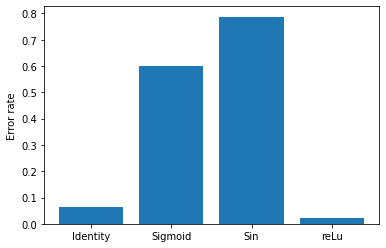

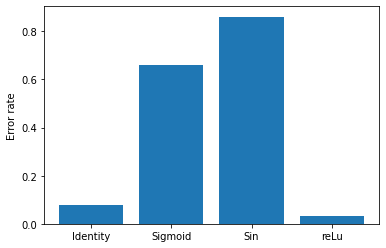

In [ ]:
names = ["Identity", "Sigmoid", "Sin", "reLu"]
plt.bar(names, results[:,0])
plt.ylabel("Error rate")
plt.show()
plt.bar(names, results[:,1])
plt.ylabel("Error rate")
plt.show()

## (e) Vary number of featrues

In [ ]:
print_v = 0
results = []

h = lambda t: (t > 0) * t
for i in [1000, 300, 100, 30, 10]:
    W = np.random.normal(0, 1, size = (trainX.shape[1] + 1, i))
    print("reLu with size", i)
    results.append(run(trainX, trainY, testX, testY, W, h))
results = np.array(results)

print_v = 1

reLu with size 1000
Training results:
	0	1	2	3	4	5	6	7	8	9	
0	5878	1	6	3	4	6	9	1	12	3	
1	1	6682	26	3	7	0	3	6	10	4	
2	11	10	5816	15	19	4	13	29	37	4	
3	6	6	58	5904	1	51	2	32	52	19	
4	6	6	14	0	5737	1	9	8	3	58	
5	18	7	11	93	14	5223	30	2	17	6	
6	11	5	8	1	10	21	5849	0	13	0	
7	4	20	31	4	34	1	1	6112	10	48	
8	8	16	21	43	18	37	17	9	5667	15	
9	13	6	8	39	53	13	2	45	23	5747	
Total error rate: 0.023083333333333334

Testing results:
	0	1	2	3	4	5	6	7	8	9	
0	968	0	2	0	0	3	4	2	1	0	
1	0	1128	3	1	0	0	1	0	2	0	
2	3	0	996	5	4	1	6	6	10	1	
3	3	0	8	971	0	7	1	4	10	6	
4	1	0	3	0	954	0	5	0	2	17	
5	3	2	1	29	1	844	5	0	4	3	
6	9	2	1	1	3	6	932	1	3	0	
7	0	6	15	3	5	0	0	987	1	11	
8	4	0	5	10	8	7	5	5	926	4	
9	8	4	3	5	15	5	0	9	5	955	
Total error rate: 0.0339
reLu with size 300
Training results:
	0	1	2	3	4	5	6	7	8	9	
0	5793	2	14	6	10	25	35	2	31	5	
1	1	6617	37	18	7	13	7	11	20	11	
2	46	26	5595	48	60	14	41	41	70	17	
3	20	19	102	5645	8	133	21	48	94	41	
4	15	20	23	2	5560	6	25	17	12	162	
5	31	24	35	120	29	5045	72	7	36	22	
6	39	17	20

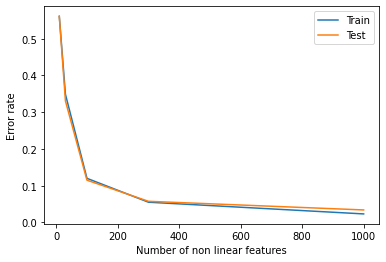

In [ ]:
plt.plot([1000, 300, 100, 30, 10], results[:,0], label = "Train")
plt.plot([1000, 300, 100, 30, 10], results[:,1], label = "Test")
plt.xlabel("Number of non linear features")
plt.ylabel("Error rate")
plt.legend()
plt.show()

We can see how reduccing features reduces remarkably the accuracy and makes the model generalize worse.

## (f) Noise

To do this test I train the model once on the training data, and test the testing data adding a noise vector with increasing standard deviation

Training results:
	0	1	2	3	4	5	6	7	8	9	
0	5870	2	9	7	4	3	10	1	13	4	
1	0	6686	17	9	10	0	2	9	4	5	
2	11	9	5834	19	18	7	6	23	28	3	
3	3	5	68	5899	1	64	0	28	42	21	
4	5	9	12	0	5735	1	11	5	6	58	
5	18	1	13	48	11	5270	35	1	17	7	
6	12	6	7	0	12	22	5848	0	11	0	
7	3	17	22	9	23	3	0	6129	9	50	
8	6	20	28	44	9	33	16	10	5664	21	
9	17	8	5	42	58	17	2	49	28	5723	
Total error rate: 0.022366666666666667

Testing results with noise:  0
	0	1	2	3	4	5	6	7	8	9	
0	971	1	1	1	0	4	0	2	0	0	
1	0	1127	2	2	0	0	1	1	2	0	
2	5	1	995	9	3	2	2	7	8	0	
3	1	0	7	969	1	15	0	5	11	1	
4	2	0	3	0	956	0	4	1	2	14	
5	4	0	1	12	1	857	8	1	7	1	
6	6	3	2	0	4	6	933	0	3	1	
7	1	6	15	3	5	1	0	981	5	11	
8	6	2	5	12	7	4	4	3	925	6	
9	6	4	2	12	20	2	0	6	3	954	
Total error rate: 0.0332


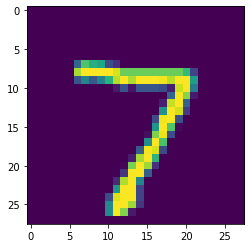

Testing results with noise:  0.01
	0	1	2	3	4	5	6	7	8	9	
0	970	1	3	1	0	3	0	2	0	0	
1	0	1127	2	2	0	1	1	1	1	0	
2	5	1	994	9	2	2	3	7	9	0	
3	2	0	7	970	1	14	0	5	10	1	
4	2	0	3	1	955	0	4	2	2	13	
5	3	0	1	10	1	863	5	1	7	1	
6	6	3	1	0	4	4	936	0	3	1	
7	1	5	14	4	5	2	0	983	3	11	
8	5	1	6	10	7	3	5	3	929	5	
9	6	5	2	12	19	3	0	5	2	955	
Total error rate: 0.0318


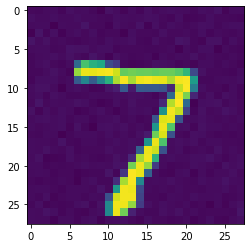

Testing results with noise:  0.03
	0	1	2	3	4	5	6	7	8	9	
0	971	1	2	0	0	4	1	0	0	1	
1	0	1127	2	1	1	0	1	0	3	0	
2	5	1	995	8	3	2	3	7	8	0	
3	0	0	9	967	1	17	0	5	10	1	
4	2	0	2	0	956	0	4	1	2	15	
5	4	0	2	12	1	858	6	1	7	1	
6	9	3	2	0	4	7	928	0	5	0	
7	0	7	13	2	6	2	1	978	4	15	
8	8	0	4	10	5	5	3	5	928	6	
9	6	4	2	10	23	3	0	5	4	952	
Total error rate: 0.034


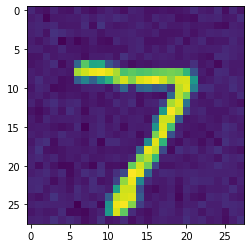

Testing results with noise:  0.1
	0	1	2	3	4	5	6	7	8	9	
0	961	1	5	0	1	7	3	2	0	0	
1	0	1116	3	1	0	2	2	1	10	0	
2	5	1	985	12	4	0	1	10	12	2	
3	4	0	21	932	1	26	2	9	15	0	
4	3	0	5	0	939	1	3	4	5	22	
5	8	0	1	23	3	839	9	2	5	2	
6	6	3	12	0	7	11	912	0	7	0	
7	1	4	17	6	6	3	0	963	4	24	
8	7	3	11	27	7	15	4	5	887	8	
9	7	4	7	14	28	7	1	18	9	914	
Total error rate: 0.0552


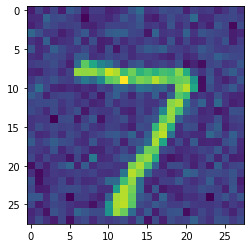

Testing results with noise:  0.3
	0	1	2	3	4	5	6	7	8	9	
0	904	0	24	8	0	25	9	3	4	3	
1	4	487	307	103	3	78	5	41	105	2	
2	22	9	898	38	6	20	12	7	18	2	
3	21	2	132	730	2	84	3	8	25	3	
4	14	0	113	47	585	47	17	54	35	70	
5	44	3	70	147	8	561	10	12	33	4	
6	51	3	174	29	22	81	573	7	18	0	
7	14	4	129	65	18	33	2	708	12	43	
8	20	9	161	158	9	79	10	14	501	13	
9	14	4	82	115	148	93	3	126	58	366	
Total error rate: 0.3687


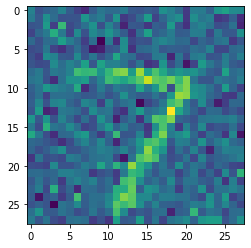

Testing results with noise:  1
	0	1	2	3	4	5	6	7	8	9	
0	552	1	200	62	5	112	19	26	2	1	
1	53	29	552	148	5	261	8	61	12	6	
2	118	6	663	91	7	106	13	21	5	2	
3	108	2	384	297	2	163	11	32	9	2	
4	77	3	388	123	67	190	23	93	6	12	
5	144	5	261	133	5	288	8	40	7	1	
6	135	2	422	82	17	178	70	48	2	2	
7	89	2	340	140	6	184	7	252	2	6	
8	87	4	396	187	8	220	11	33	22	6	
9	81	4	340	158	33	208	12	145	6	22	
Total error rate: 0.7738


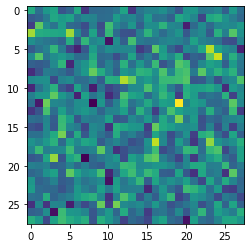

Training results:
	0	1	2	3	4	5	6	7	8	9	
0	3450	204	374	490	175	217	370	292	195	156	
1	160	4873	349	322	140	131	172	230	218	147	
2	577	871	2158	603	312	129	473	381	284	170	
3	539	781	460	2749	211	176	256	367	383	209	
4	398	467	462	381	1905	161	351	721	286	710	
5	767	613	375	953	345	773	337	476	465	317	
6	633	606	747	404	426	143	2206	248	245	260	
7	412	678	375	431	480	159	219	2770	235	506	
8	427	1147	452	833	346	186	290	470	1347	353	
9	382	595	353	458	852	183	266	1056	304	1500	
Total error rate: 0.6044833333333334

Testing results with noise:  0
	0	1	2	3	4	5	6	7	8	9	
0	494	42	65	93	29	44	82	45	47	39	
1	33	705	83	76	38	21	42	54	51	32	
2	104	182	313	105	61	23	86	72	58	28	
3	90	136	80	365	34	58	47	79	79	42	
4	67	87	79	66	253	34	71	134	60	131	
5	115	104	79	180	70	86	47	81	84	46	
6	118	101	129	67	79	26	312	45	43	38	
7	69	122	69	78	86	26	50	379	48	101	
8	93	186	76	146	57	35	65	86	165	65	
9	69	104	62	79	149	41	54	204	55	192	
Total error rate: 0.6736


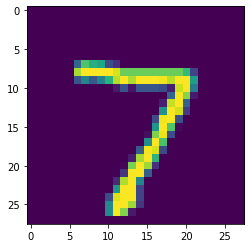

Testing results with noise:  0.01
	0	1	2	3	4	5	6	7	8	9	
0	488	43	82	84	34	48	86	49	41	25	
1	45	717	72	69	34	29	33	49	51	36	
2	99	176	323	118	52	28	79	67	52	38	
3	96	138	86	374	26	48	48	84	67	43	
4	92	85	80	71	271	34	64	133	34	118	
5	134	110	74	166	68	72	68	78	72	50	
6	129	90	144	69	72	29	294	44	46	41	
7	74	114	64	87	92	23	37	391	54	92	
8	73	170	86	173	58	23	60	98	166	67	
9	66	94	45	91	147	41	51	198	71	205	
Total error rate: 0.6699


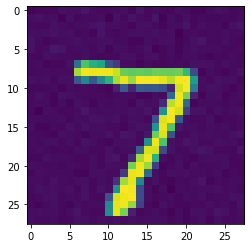

Testing results with noise:  0.03
	0	1	2	3	4	5	6	7	8	9	
0	487	36	87	88	32	38	77	66	42	27	
1	31	741	78	64	33	28	31	49	42	38	
2	122	197	292	107	54	30	87	63	47	33	
3	101	140	88	404	33	43	40	61	66	34	
4	76	95	65	58	226	35	78	134	50	165	
5	124	106	68	169	46	80	65	102	80	52	
6	119	93	154	69	69	23	301	44	37	49	
7	71	141	62	89	72	40	57	391	39	66	
8	80	195	69	168	46	20	68	81	164	83	
9	65	84	67	83	142	25	58	186	69	230	
Total error rate: 0.6684


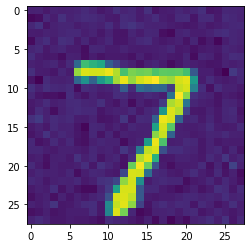

Testing results with noise:  0.1
	0	1	2	3	4	5	6	7	8	9	
0	521	32	65	85	34	41	75	61	32	34	
1	34	706	78	84	36	28	45	48	44	32	
2	87	186	320	111	48	28	92	62	69	29	
3	94	113	84	401	38	38	47	64	91	40	
4	73	85	82	74	235	41	72	149	40	131	
5	138	96	66	163	47	89	65	96	76	56	
6	120	80	131	84	72	27	303	61	35	45	
7	67	111	79	93	96	26	57	368	41	90	
8	82	173	77	171	66	37	59	89	153	67	
9	78	98	61	84	147	38	49	198	60	196	
Total error rate: 0.6708


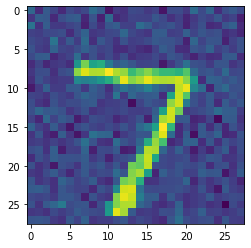

Testing results with noise:  0.3
	0	1	2	3	4	5	6	7	8	9	
0	419	40	100	78	45	68	72	92	32	34	
1	47	473	160	107	48	67	45	98	53	37	
2	74	134	333	120	66	49	81	77	64	34	
3	104	104	97	340	32	68	60	83	73	49	
4	62	65	126	87	237	56	57	134	43	115	
5	124	87	96	149	78	116	51	98	64	29	
6	118	64	194	65	80	57	236	70	24	50	
7	70	87	119	81	97	60	52	351	43	68	
8	80	135	119	152	62	58	61	93	165	49	
9	69	67	103	87	175	52	55	215	48	138	
Total error rate: 0.7192


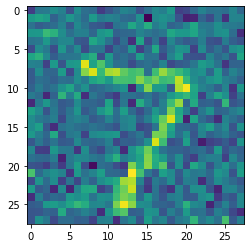

Testing results with noise:  1
	0	1	2	3	4	5	6	7	8	9	
0	151	12	270	71	38	247	30	114	29	18	
1	38	77	423	76	36	246	31	162	29	17	
2	49	35	492	61	38	150	26	126	32	23	
3	46	31	297	167	32	229	27	122	40	19	
4	36	27	230	67	124	210	35	198	27	28	
5	56	16	219	79	55	280	14	126	28	19	
6	53	23	350	48	73	157	80	127	18	29	
7	37	31	239	66	71	202	16	326	20	20	
8	52	33	272	88	65	213	32	138	55	26	
9	40	23	225	59	111	205	25	252	23	46	
Total error rate: 0.8202


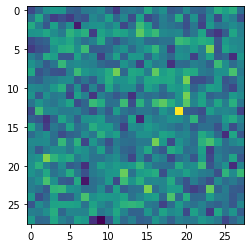

Training results:
	0	1	2	3	4	5	6	7	8	9	
0	5824	2	10	8	13	19	11	7	28	1	
1	2	6623	35	22	9	12	6	10	15	8	
2	59	99	5473	43	66	15	43	65	83	12	
3	27	59	136	5556	9	134	25	53	99	33	
4	14	23	21	1	5602	6	11	15	7	142	
5	50	52	42	183	41	4865	105	7	40	36	
6	52	13	37	3	45	78	5675	0	15	0	
7	6	75	45	7	81	4	1	5856	2	188	
8	38	237	72	128	52	158	49	24	5025	68	
9	23	19	14	95	202	16	2	122	38	5418	
Total error rate: 0.06805

Testing results with noise:  0
	0	1	2	3	4	5	6	7	8	9	
0	963	0	2	0	2	5	4	3	1	0	
1	0	1120	2	3	3	1	5	0	1	0	
2	14	19	923	7	11	5	12	15	26	0	
3	8	2	21	922	5	18	4	10	17	3	
4	3	1	9	0	932	0	7	4	3	23	
5	8	6	2	42	17	775	16	4	15	7	
6	16	4	13	0	5	20	898	0	2	0	
7	0	17	18	3	11	1	0	947	1	30	
8	7	27	11	20	16	42	9	11	817	14	
9	6	4	3	12	37	6	0	20	11	910	
Total error rate: 0.0793


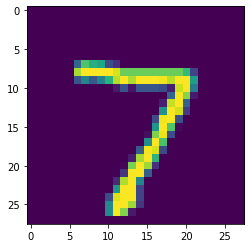

Testing results with noise:  0.01
	0	1	2	3	4	5	6	7	8	9	
0	206	102	119	86	117	65	86	80	63	56	
1	244	110	157	81	137	53	102	122	71	58	
2	221	113	115	80	140	63	84	91	43	82	
3	220	115	115	78	145	56	70	104	60	47	
4	206	105	130	102	115	48	91	75	57	53	
5	197	100	94	75	112	51	67	92	54	50	
6	235	117	120	71	111	48	94	67	51	44	
7	157	141	133	86	138	63	82	108	52	68	
8	236	109	119	72	113	50	70	98	46	61	
9	166	148	120	88	124	58	97	88	66	54	
Total error rate: 0.9023


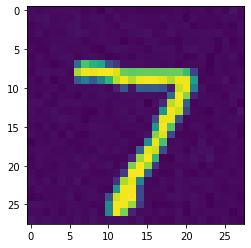

Testing results with noise:  0.03
	0	1	2	3	4	5	6	7	8	9	
0	207	106	123	71	110	56	85	100	60	62	
1	235	107	131	106	142	81	105	104	60	64	
2	228	119	139	72	133	51	83	95	62	50	
3	213	115	113	80	118	74	81	100	63	53	
4	210	99	117	60	120	65	86	103	58	64	
5	202	78	109	81	128	48	62	93	51	40	
6	219	114	126	79	112	55	69	79	47	58	
7	169	147	134	85	124	63	84	98	62	62	
8	214	91	130	79	120	57	76	93	60	54	
9	179	109	132	92	136	58	79	97	64	63	
Total error rate: 0.9009


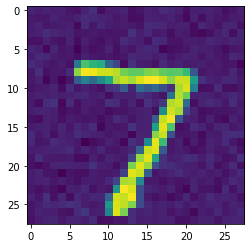

Testing results with noise:  0.1
	0	1	2	3	4	5	6	7	8	9	
0	215	99	130	75	114	66	80	88	60	53	
1	240	123	144	96	157	70	79	111	47	68	
2	273	129	96	78	106	56	80	92	65	57	
3	211	116	132	89	119	52	79	102	54	56	
4	211	104	122	78	110	58	98	94	64	43	
5	201	104	102	59	102	52	82	84	50	56	
6	223	126	109	78	124	58	69	84	36	51	
7	187	133	140	94	112	61	81	100	69	51	
8	238	116	117	68	112	59	66	94	55	49	
9	179	119	122	98	135	57	89	94	66	50	
Total error rate: 0.9041


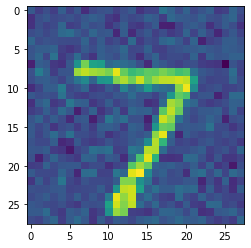

Testing results with noise:  0.3
	0	1	2	3	4	5	6	7	8	9	
0	227	106	99	77	107	65	85	80	73	61	
1	265	126	128	90	119	66	110	90	72	69	
2	234	122	141	81	125	54	89	82	47	57	
3	226	125	113	79	135	62	82	89	61	38	
4	232	127	115	78	115	55	84	83	46	47	
5	173	98	122	74	122	50	85	72	52	44	
6	211	113	111	59	123	41	90	86	71	53	
7	235	104	122	67	134	62	86	108	58	52	
8	216	116	119	76	117	52	66	99	59	54	
9	202	118	130	86	123	54	81	97	58	60	
Total error rate: 0.8945


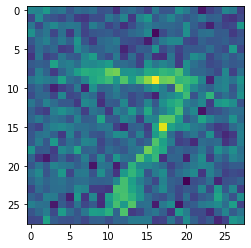

Testing results with noise:  1
	0	1	2	3	4	5	6	7	8	9	
0	205	114	126	69	118	73	81	86	56	52	
1	249	125	131	97	140	58	105	114	59	57	
2	208	130	115	85	130	53	85	104	62	60	
3	213	98	136	78	134	62	84	101	44	60	
4	224	107	112	73	117	68	69	90	57	65	
5	191	117	103	73	99	48	87	83	47	44	
6	209	107	109	79	130	53	72	96	54	49	
7	239	116	110	99	118	56	80	88	55	67	
8	213	89	127	92	118	61	82	80	65	47	
9	223	134	112	80	132	54	82	87	63	42	
Total error rate: 0.9045


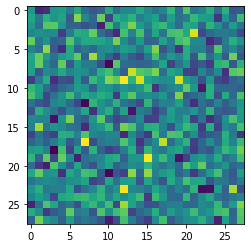

In [ ]:
import math
print_v = 0

results_reLu = []
h = lambda t: (t > 0) * t
W = np.random.normal(0, 1, size = (trainX.shape[1], 1000))
MC = multiClass_OneVsOne(h(trainX @ W), trainY)
print("Training results:")
confusionMatrix(trainY, MC.run(h(trainX @ W)))
print()
for i in [0, 0.01, 0.03, 0.1, 0.3, 1]:
    print("Testing results with noise: ", i)
    noise = np.random.normal(0, i, size = (testX.shape[0], testX.shape[1]))
    results_reLu.append(confusionMatrix(testY, MC.run(h((testX + noise) @ W))))
    plt.imshow(testX[0].reshape(28, 28) + noise[0].reshape(28, 28))
    plt.show()
    

results_sigmoid = []
h = lambda t: 1 / (1 - math.e ** (-t))
W = np.random.normal(0, 1, size = (trainX.shape[1], 1000))
MC = multiClass_OneVsOne(h(trainX @ W), trainY)
print("Training results:")
confusionMatrix(trainY, MC.run(h(trainX @ W)))
print()
for i in [0, 0.01, 0.03, 0.1, 0.3, 1]:
    print("Testing results with noise: ", i)
    noise = np.random.normal(0, i, size = (testX.shape[0], testX.shape[1]))
    results_sigmoid.append(confusionMatrix(testY, MC.run(h((testX + noise) @ W))))
    plt.imshow(testX[0].reshape(28, 28) + noise[0].reshape(28, 28))
    plt.show()
    


results_lin = []
h = lambda t: t
W = np.random.normal(0, 1, size = (trainX.shape[1], 1000))
MC = multiClass_OneVsOne(h(trainX @ W), trainY)
print("Training results:")
confusionMatrix(trainY, MC.run(h(trainX @ W)))
print()
for i in [0, 0.01, 0.03, 0.1, 0.3, 1]:
    print("Testing results with noise: ", i)
    noise = np.random.normal(0, i, size = (testX.shape[0], testX.shape[1]))
    results_lin.append(confusionMatrix(testY, MC.run(h((testX + noise) @ W))))
    plt.imshow(testX[0].reshape(28, 28) + noise[0].reshape(28, 28))
    plt.show()
    
print_v = 1

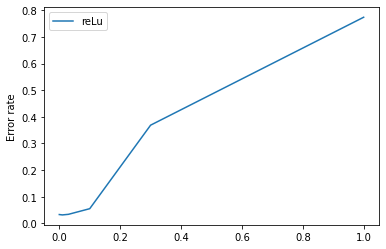

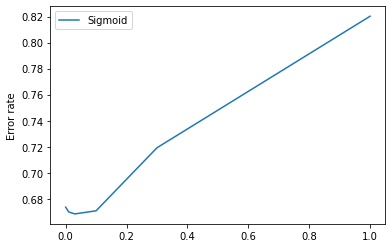

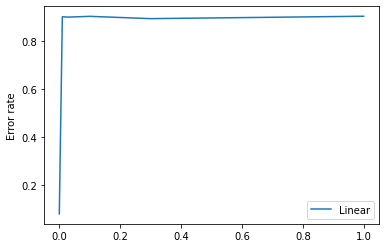

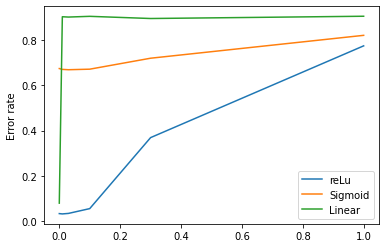

In [ ]:
plt.plot([0, 0.01, 0.03, 0.1, 0.3, 1], results_reLu, label = "reLu")
plt.ylabel("Error rate")
plt.legend()
plt.show()

plt.plot([0, 0.01, 0.03, 0.1, 0.3, 1], results_sigmoid, label = "Sigmoid")
plt.ylabel("Error rate")
plt.legend()
plt.show()

plt.plot([0, 0.01, 0.03, 0.1, 0.3, 1], results_lin, label = "Linear")
plt.ylabel("Error rate")
plt.legend()
plt.show()

plt.plot([0, 0.01, 0.03, 0.1, 0.3, 1], results_reLu, label = "reLu")
plt.plot([0, 0.01, 0.03, 0.1, 0.3, 1], results_sigmoid, label = "Sigmoid")
plt.plot([0, 0.01, 0.03, 0.1, 0.3, 1], results_lin, label = "Linear")
plt.ylabel("Error rate")
plt.legend()
plt.show()

I repeat the test with linear, but with an $L = 100$

Training results:
	0	1	2	3	4	5	6	7	8	9	
0	5743	2	18	13	16	43	42	9	34	3	
1	2	6601	37	35	5	18	3	15	21	5	
2	65	121	5225	77	82	41	113	80	125	29	
3	42	68	125	5293	17	300	38	61	115	72	
4	14	48	22	12	5368	21	44	37	13	263	
5	67	96	22	190	62	4730	124	26	64	40	
6	35	29	53	6	42	82	5642	3	26	0	
7	14	107	68	14	99	25	1	5724	17	196	
8	27	296	73	161	52	232	67	27	4793	123	
9	36	34	20	90	253	51	6	254	39	5166	
Total error rate: 0.09525

Testing results with noise:  0
	0	1	2	3	4	5	6	7	8	9	
0	959	0	1	0	2	6	7	2	2	1	
1	0	1121	2	3	1	2	2	2	1	1	
2	13	32	897	20	13	3	16	8	27	3	
3	9	3	19	905	3	29	4	12	18	8	
4	2	3	6	1	919	5	7	6	3	30	
5	8	6	3	43	14	778	18	4	15	3	
6	9	5	8	3	8	11	907	1	5	1	
7	0	25	22	3	15	1	0	930	2	30	
8	9	27	8	24	21	35	18	13	806	13	
9	8	8	1	17	49	11	0	32	7	876	
Total error rate: 0.0902


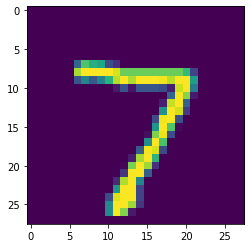

Testing results with noise:  0.01
	0	1	2	3	4	5	6	7	8	9	
0	961	0	1	0	2	5	6	2	2	1	
1	0	1121	2	4	1	2	2	2	1	0	
2	14	34	892	20	13	3	17	9	27	3	
3	9	3	18	904	3	29	4	15	17	8	
4	2	3	6	1	913	5	8	6	3	35	
5	8	7	3	41	13	781	18	4	14	3	
6	8	5	8	3	8	12	907	1	5	1	
7	1	27	22	2	17	1	0	925	2	31	
8	10	26	7	24	19	38	18	13	805	14	
9	8	8	1	16	48	12	0	31	7	878	
Total error rate: 0.0913


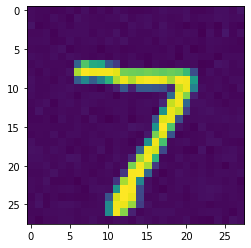

Testing results with noise:  0.03
	0	1	2	3	4	5	6	7	8	9	
0	959	0	1	0	2	6	6	2	2	2	
1	0	1121	3	2	1	1	2	2	2	1	
2	12	34	894	17	14	5	15	12	26	3	
3	8	2	17	906	3	32	3	15	15	9	
4	2	2	8	1	910	5	7	6	4	37	
5	11	9	3	38	14	769	21	5	14	8	
6	9	5	12	4	8	11	902	1	5	1	
7	0	26	24	1	14	0	0	926	5	32	
8	9	28	6	19	22	40	21	12	803	14	
9	11	9	0	15	52	10	0	29	7	876	
Total error rate: 0.0934


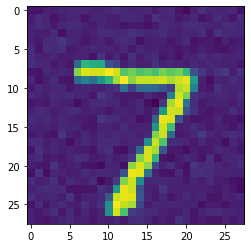

Testing results with noise:  0.1
	0	1	2	3	4	5	6	7	8	9	
0	946	0	1	3	2	13	10	2	2	1	
1	0	1113	5	4	1	3	1	2	6	0	
2	17	37	853	24	24	5	24	13	31	4	
3	9	3	24	865	4	47	5	12	25	16	
4	5	6	5	4	880	9	13	10	4	46	
5	15	10	0	64	18	723	25	10	21	6	
6	11	9	18	4	14	17	878	4	2	1	
7	2	25	24	4	21	1	0	897	2	52	
8	7	33	12	40	25	42	30	17	752	16	
9	10	15	2	17	68	13	3	51	12	818	
Total error rate: 0.1275


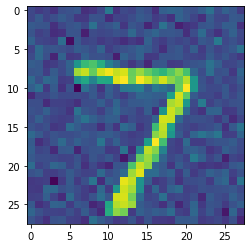

Testing results with noise:  0.3
	0	1	2	3	4	5	6	7	8	9	
0	788	3	23	12	13	65	36	19	9	12	
1	2	864	47	40	19	24	27	36	54	22	
2	42	89	630	64	30	16	73	19	49	20	
3	36	47	62	608	22	99	24	30	55	27	
4	19	26	35	28	616	29	53	70	23	83	
5	58	51	22	100	44	459	40	26	60	32	
6	50	23	66	12	60	55	653	9	19	11	
7	21	49	46	37	54	41	13	614	13	140	
8	24	94	59	70	53	89	38	22	477	48	
9	22	24	37	60	152	49	23	129	53	460	
Total error rate: 0.3831


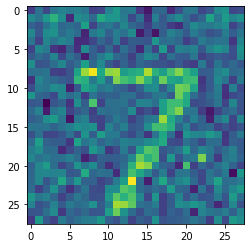

Testing results with noise:  1
	0	1	2	3	4	5	6	7	8	9	
0	336	75	99	60	55	99	90	65	47	54	
1	82	380	99	104	59	87	112	103	53	56	
2	108	144	263	92	76	41	140	60	58	50	
3	138	152	89	192	83	90	81	68	58	59	
4	82	104	74	60	230	54	126	123	39	90	
5	116	134	59	96	90	154	81	53	63	46	
6	102	106	102	62	93	79	280	49	26	59	
7	128	125	96	66	104	67	76	217	41	108	
8	98	126	99	118	71	102	89	60	147	64	
9	90	112	97	83	149	81	83	115	54	145	
Total error rate: 0.7656


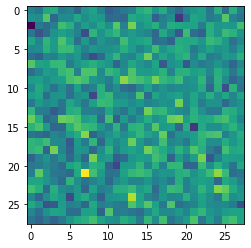

In [ ]:
print_v = 0
results_lin2 = []
h = lambda t: t
W = np.random.normal(0, 1, size = (trainX.shape[1], 100))
MC = multiClass_OneVsOne(h(trainX @ W), trainY)
print("Training results:")
confusionMatrix(trainY, MC.run(h(trainX @ W)))
print()
for i in [0, 0.01, 0.03, 0.1, 0.3, 1]:
    print("Testing results with noise: ", i)
    noise = np.random.normal(0, i, size = (testX.shape[0], testX.shape[1]))
    results_lin2.append(confusionMatrix(testY, MC.run(h((testX + noise) @ W))))
    plt.imshow(testX[0].reshape(28, 28) + noise[0].reshape(28, 28))
    plt.show()
    
print_v = 1

The most remarkable result is how the linear model error jump ass soon as noise is introduced.It is reazonable it is the one that generalizes worse, as it can't use non-linear featrues. But I find weird it jumps that fust to basically random guessing ass soon as there is a bit of noise.
Tenting with smaller $L$ it generalizes better

Both sigmoid and reLu have the greatest increase of error between 0.1 and 0.3, but in general we can sey they generalize quite well, even with a huge noise they still outperform random predictions (error = 0.9).